## PHYS 105A:  Introduction to Scientific Computing

# Assignment: Monte Carlo Integration

In this assignment, we will learn how to compute $\pi$ using a Monte Carlo method.

In [1]:
# Step 1. Import Libraries
#
# Although there are libraries such as `numpy` and `scipy` that helps scientific computing in python,
# we will not use these libraries for this assignment.
# We will use python's built-in math library `math` to access `pi`.
# For random number generation, we will use python's build-in library `random`.
# For plotting, we will the external libraries `matplotlib`.

from math import pi
import random as rnd
from matplotlib import pyplot as plt

print('π =', pi)

π = 3.141592653589793


The idea of using Monte Carlo to compute $\pi$ is very simple.  We use the facts that

* The area of a circle is $A = \pi r^2$.

Given that a quater circle with radius $r$ fits inside a $r\times r$ box (see the figure below), the *ratio* between the red area in the following square provides:

$\pi = 4 A_\mathrm{red}/A_\mathrm{box}$

For simplicity, we can use unit circle in this calculation.

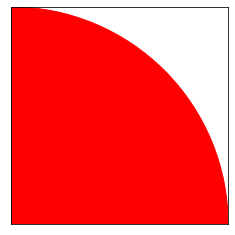

In [2]:
fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 1, color='r'))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_aspect('equal')

In [3]:
# Step 2. Generate one random point within the 1x1 box
#
# We already learn from the lecture that python's rnd.random() function
# returns a random number in [0,1).
#
# Let's now use rnd.random() to generate a random point with (x, y)
# coordinates.

def random_point():
    return rnd.random(), rnd.random() # what should this return?

# Once you finish the above function, you should be able to create a
# random point by simply calling the function
print(random_point())

(0.4878531394177087, 0.12293321821689707)


In [4]:
# Step 3. Check if a point is in the quarter circle

def inside(x, y):
    return x*x + y * y < 1    # how can you check if the point (x, y)
                              # falls inside a unit circle?

In [5]:
# Step 4. Count the number of points inside the quarter circle

n_sample = 1000
n_inside = 0
for i in range(n_sample):
    # Hints: first create a random point using your random_point() function.
    # And then check if your random point is inside the quarter circle using
    # your inside() function.  Add one to n_inside if the point is inside.
    x, y = random_point()
    if inside(x, y):
        n_inside += 1

print(n_inside)

786


In [7]:
# Step 5. Compute the approximation of pi based on n_insie and n_sample

mypi = 4 * n_inside / n_sample # what formula did we derive to approximate pi?

print(mypi)

3.144


In [8]:
# Step 6. Put steps 4 and 5 into a single function.
#
# The above calculation works!  However, it will be nice to put them into
# a single function so we can simply pass in the number of sample to it and
# get the result

def montecarlo_pi(n_sample=1000):
    n_inside = 0
    for i in range(n_sample): # Hint: copy some of codes from Step 4 to here
        x, y = random_point()
        if inside(x, y):
            n_inside += 1
    return 4 * n_inside / n_sample # Hint: copy some of codes from Step 5 to here

# You may now call `montecarlo_pi()` to get an approximation of pi
print(montecarlo_pi())

3.168


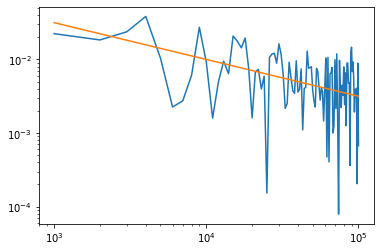

In [9]:
# Step 7. Compute how good/bad is montecarlo_pi() to approximate pi
#
# We did the same thing in the lecture.  Feel free to refer back to
# https://github.com/uarizona-2021spring-phys105a/phys105a/blob/main/04/montecarlo.ipynb
# Basically, we want to plot the error as a function of the numbers of samples

N_sample = [1000 * i for i in range(1, 100+1)]

Error = []
for n_sample in N_sample:
    # What is the error of montecarlo_pi()?
    # Hint: we did `from math import pi`.
    # So `pi` has the correct value of π at machine precision.
    error = abs(pi - montecarlo_pi(n_sample))
    Error.append(error)
    
plt.loglog(N_sample, Error)
plt.loglog(N_sample, [n_sample**(-0.5) for n_sample in N_sample])

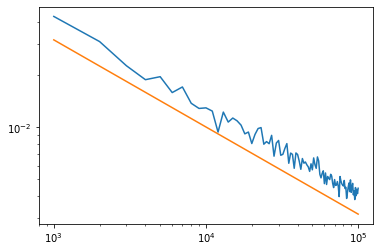

In [10]:
# Step 8. Improve the above plot by drawing more realizations
#
# We also did this in the lecture.  Feel free to refer back to
# https://github.com/uarizona-2021spring-phys105a/phys105a/blob/main/04/montecarlo.ipynb
# The idea is we want to compute the error multiple times for each value of `n_sample`,
# and average over these errors in order to make the final plot more meaningful.

Error = []
for n_sample in N_sample:
    # Hint: you need to add an additional loop here to average the errors.
    error = 0
    for t in range(100):
        error += abs(pi - montecarlo_pi(n_sample))
    error /= 100
    Error.append(error)
    
plt.loglog(N_sample, Error)
plt.loglog(N_sample, [n_sample**(-0.5) for n_sample in N_sample])